# Sanity Check
Version: 1 <br>
Creator: Elyès Tabbane <br>
Date: 04.07.2024 <br>
Participant: 02 <br>
Center: Neurospin <br>
<br>

---
List of tests: <br>
<b> Behavioral data <b> <br> <br>

<b> MEG data <b> <br> <br>
<ol>
    <li> C’est bien ce que je voulais présenter qui a été présenté et avec le bon délais (SOA)</li>
    <li> Qu’on reçoit bien les triggers aux bons moments</li>
</ol>

---
<i>This report aims to run a battery of sanity checks to detect any mistakes that was not noted during the Friday 28th of June 2024 MEGSEQ experiment. </i>

In [167]:
# Imports
from modules import *

pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.max_rows', 150)      # Display up to 150 rows

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


---
# MEG DATA TESTING

-- <b> Presentation Events (MEG file) should correspond to presented sequences (behavioral file)</b> --

In [3]:
get_event_presentation(path_raw, path_behavioral)

**run01_raw.fif**. Number of trials: OK

**run01_raw.fif**. Matching Raw Events and Behavioral file: OK

-----------------


**run02_raw.fif**. Number of trials: OK

**run02_raw.fif**. Matching Raw Events and Behavioral file: OK

-----------------


**run03_raw.fif**. Number of trials: OK

**run03_raw.fif**. Matching Raw Events and Behavioral file: OK

-----------------


**run04_raw.fif**. Number of trials: OK

**run04_raw.fif**. Matching Raw Events and Behavioral file: OK

-----------------


**run05_raw.fif**. Number of trials: OK

**run05_raw.fif**. Matching Raw Events and Behavioral file: OK

-----------------


**run06_raw.fif**. Number of trials: OK

**run06_raw.fif**. Matching Raw Events and Behavioral file: OK

-----------------


**run07_raw.fif**. Number of trials: OK

**run07_raw.fif**. Matching Raw Events and Behavioral file: OK

-----------------


**run08_raw.fif**. Number of trials: OK

**run08_raw.fif**. Matching Raw Events and Behavioral file: OK

-----------------


**run09_raw.fif**. Number of trials: OK

**run09_raw.fif**. Matching Raw Events and Behavioral file: OK

-----------------


**run10_raw.fif**. Number of trials: OK

**run10_raw.fif**. Matching Raw Events and Behavioral file: OK

-----------------


**run11_raw.fif**. Number of trials: OK

**run11_raw.fif**. Matching Raw Events and Behavioral file: OK

-----------------


**run12_raw.fif**. Number of trials: OK

**run12_raw.fif**. Matching Raw Events and Behavioral file: OK

-----------------


**run13_raw.fif**. Number of trials: OK

**run13_raw.fif**. Matching Raw Events and Behavioral file: OK

-----------------


**run14_raw.fif**. Number of trials: OK

**run14_raw.fif**. Matching Raw Events and Behavioral file: OK

-----------------


**run15_raw.fif**. Number of trials: OK

**run15_raw.fif**. Matching Raw Events and Behavioral file: OK

-----------------


**run16_raw.fif**. Number of trials: OK

**run16_raw.fif**. Matching Raw Events and Behavioral file: OK

-----------------


**run17_raw.fif**. Number of trials: OK

**run17_raw.fif**. Matching Raw Events and Behavioral file: OK

-----------------


**run18_raw.fif**. Number of trials: OK

**run18_raw.fif**. Matching Raw Events and Behavioral file: OK

-----------------


Summary: 
 **All presented sequence from MEG data correspond to presented sequence in the Behavioral file. 
All presented blocks have the expected number of trials (15)**

<br><br><br><br>

-- <b> Plot the SOA </b> --

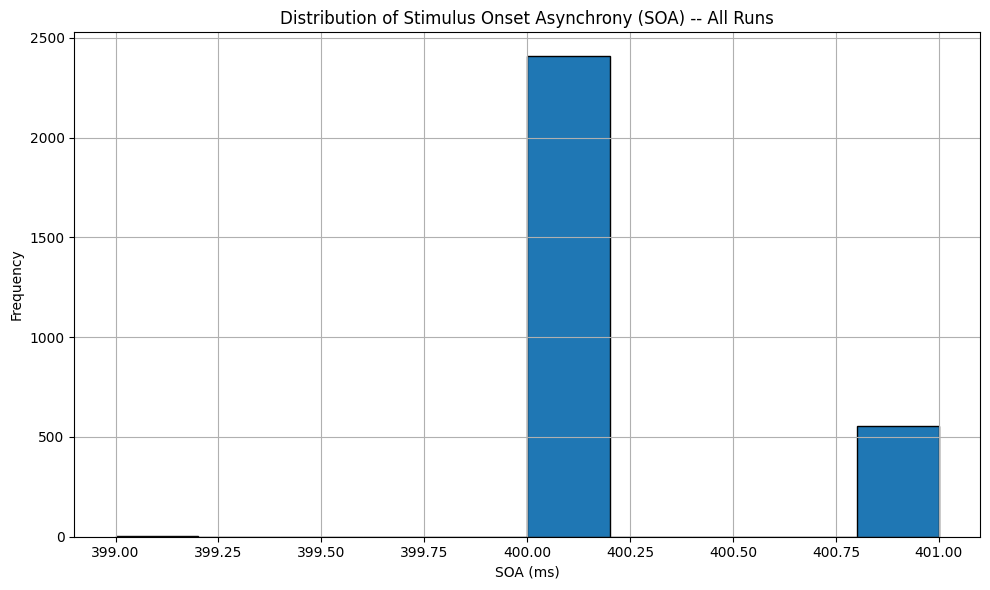

In [3]:
plot_presentation_SOA(path_raw, path_behavioral)

-- <b> Time Per Run </b> --

In [45]:
get_time_per_run(path_raw,per_run=False)

 **Mean duration**: 8 minutes 3 secondss

<br><br>

-- <b> Mean duration per trial </b> --

In [147]:
get_mean_time_per_trial(path_raw)

One trial duration is calculated as the time between [first element of sequence n] - [first element of sequence n+1]


 **Mean duration**: 0 minutes 27 secondss

<br><br>

---
# Behavioral Testing

<i> Performances (DL, Error rate, token error) </i>

In [152]:
df=pd.read_csv(path_processed_behavioral_file)

In [154]:
for name in df['sequenceName'].unique():
    print(f' {name} was tested in this experiment')
print('----------------')
for name in seq_name_list:
    if name not in df['sequenceName'].unique():
        print(f' {name} was not tested in this experiment')

 RepEmbed was tested in this experiment
 CRep3 was tested in this experiment
 Rep4 was tested in this experiment
 C1RepEmbed was tested in this experiment
 Rep3 was tested in this experiment
 CRep4 was tested in this experiment
 C2RepEmbed was tested in this experiment
 Rep2 was tested in this experiment
 CRep2 was tested in this experiment
----------------


/opt/anaconda3/envs/mne_python/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/anaconda3/envs/mne_python/lib/python3.9/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


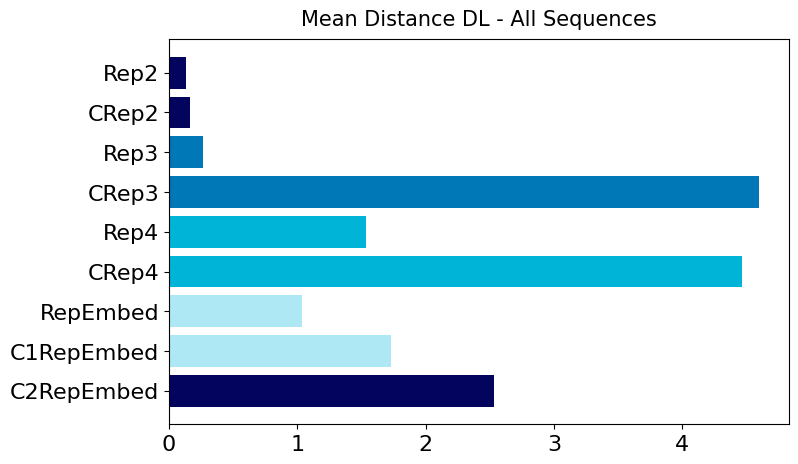

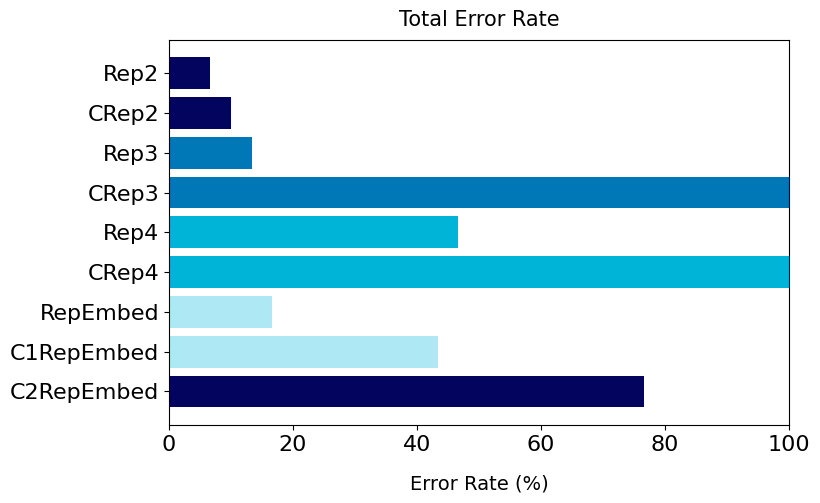

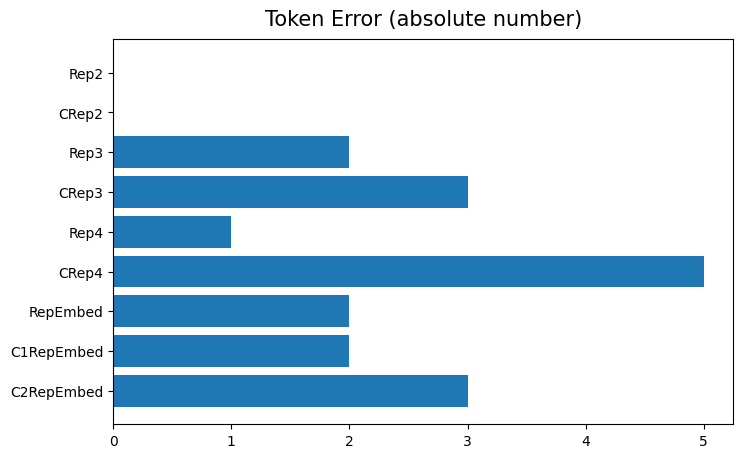

In [156]:
run_preliminary_behavioral_pipeline()

---
# Analyses MEG

### 1. Clean data
1. Run cell : 'Load some runs'
2. Manually inspect each raw file loaded with raw.plot() + mark bad channels by clicking
3. Run cell : 'Define bad channels'
4. Run 'Load some runs' again

In [158]:
bad_channels_defined=False

<b> Load some runs </b>

In [177]:
runs_path=os.listdir(path_raw)[1::]

# List of runs to load
selection_runs = [1,4,13]

# Take first raw data to define reference alignment
run_index=selection_runs[0]-1
ref_path = os.path.join(path_raw, runs_path[run_index])
raw_ref = mne.io.read_raw_fif(ref_path, allow_maxshield=True, preload=True)
dev_head_t_ref = raw_ref.info['dev_head_t']
del raw_ref
gc.collect()

raw_all=[]

# Process each run separately
counter_bad_channels=0 # Track which array of bad channels to add to the raw file
for run in selection_runs:
    run_index=run-1
    raw_file = os.path.join(path_raw,runs_path[run_index])
    raw = mne.io.read_raw_fif(raw_file, allow_maxshield=True, verbose=None, preload=True)
    if bad_channels_defined:
        raw.info["bads"]=all_manual_bads[counter_bad_channels]
        raw = maxwell_filter(raw, origin='auto', coord_frame='head', destination=dev_head_t_ref, cross_talk=path_cross_talk, calibration=path_calibration)
        counter_bad_channels+=1
    filt_raw=raw.filter(l_freq=1.0, h_freq=40)
    
    
    del raw
    # Rename EOG and ECG channels
    #raw.set_channel_types({'BIO002': 'eog', 'BIO003': 'ecg'})

    # Append to raw_all
    raw_all.append(filt_raw)
    del filt_raw
    gc.collect()

# This is redundant but for some reasons, sometimes bad channels definition doesn't work in the loop 
if bad_channels_defined:
    for k in range(len(all_manual_bads)):
        raw_all[k].info['bads']=all_manual_bads[k]

<b> Define bad channels </b>

In [175]:
# -- Once manual inspection and tagging has been done
all_manual_bads=[]

manual_bads=deepcopy(raw_all[0].info["bads"])
if len(manual_bads)==0:
    print(f'No bad channel detected on run {selection_runs[0]}')
raw_all[0].info["bads"]=manual_bads
all_manual_bads.append(manual_bads)

manual_bads=deepcopy(raw_all[1].info["bads"])
if len(manual_bads)==0:
    print(f'No bad channel detected on run {selection_runs[1]}')
raw_all[1].info["bads"]=manual_bads
all_manual_bads.append(manual_bads)


manual_bads=deepcopy(raw_all[2].info["bads"])
if len(manual_bads)==0:
    print(f'No bad channel detected on run {selection_runs[2]}')
raw_all[2].info["bads"]=manual_bads
all_manual_bads.append(manual_bads)

bad_channels_defined=True

### Artifact removal

<b> FIT ICA </b>

In [206]:
"""
When concatenating raw files using mne.concatenate_raws(), 
MNE requires that certain metadata attributes (such as bad channels, sampling frequency, etc.) 
are consistent across all files.
"""
# Make the 'bads' lists consistent across all raw files.
# -- Collect all unique bad channels
all_bads = set()
for raw in raw_all:
    all_bads.update(raw.info['bads'])

# Convert set back to list
all_bads = list(all_bads)

# Apply this list to each raw file
for raw in raw_all:
    raw.info['bads'] = all_bads


In [ ]:
# concatenate the raw files
raw_concatenated=mne.concatenate_raws(raw_all)
del raw_all
gc.collect()

In [210]:
# Fit ICA
ica = ICA(n_components=20, max_iter="auto", random_state=97,method='picard')
ica.fit(raw_concatenated)

<ICA | raw data decomposition, method: picard (fit in 84 iterations on 1481000 samples), 20 ICA components (364 PCA components available), channel types: mag, grad, eeg, no sources marked for exclusion>

In [215]:
import pickle
# Save the ICA object to a file
#with open(os.path.join(path_save_ICA,f'/sub_{sub_nb:02}_ICA_obj.pkl'), 'wb') as file:
    #pickle.dump(ica, file)

with open(f'sub_{sub_nb:02}_ICA_obj.pkl', 'wb') as file:
    pickle.dump(ica, file)

<i> If ICA is already save somewhere </i>

In [ ]:
# Load the ICA object from the file
with open(os.path.join(path_save_ICA,f'/sub_{sub_nb:02}_ICA_obj.pkl'), 'wb') as file:
    ica = pickle.load(file)

<b> Select components that look like artifacts </b>

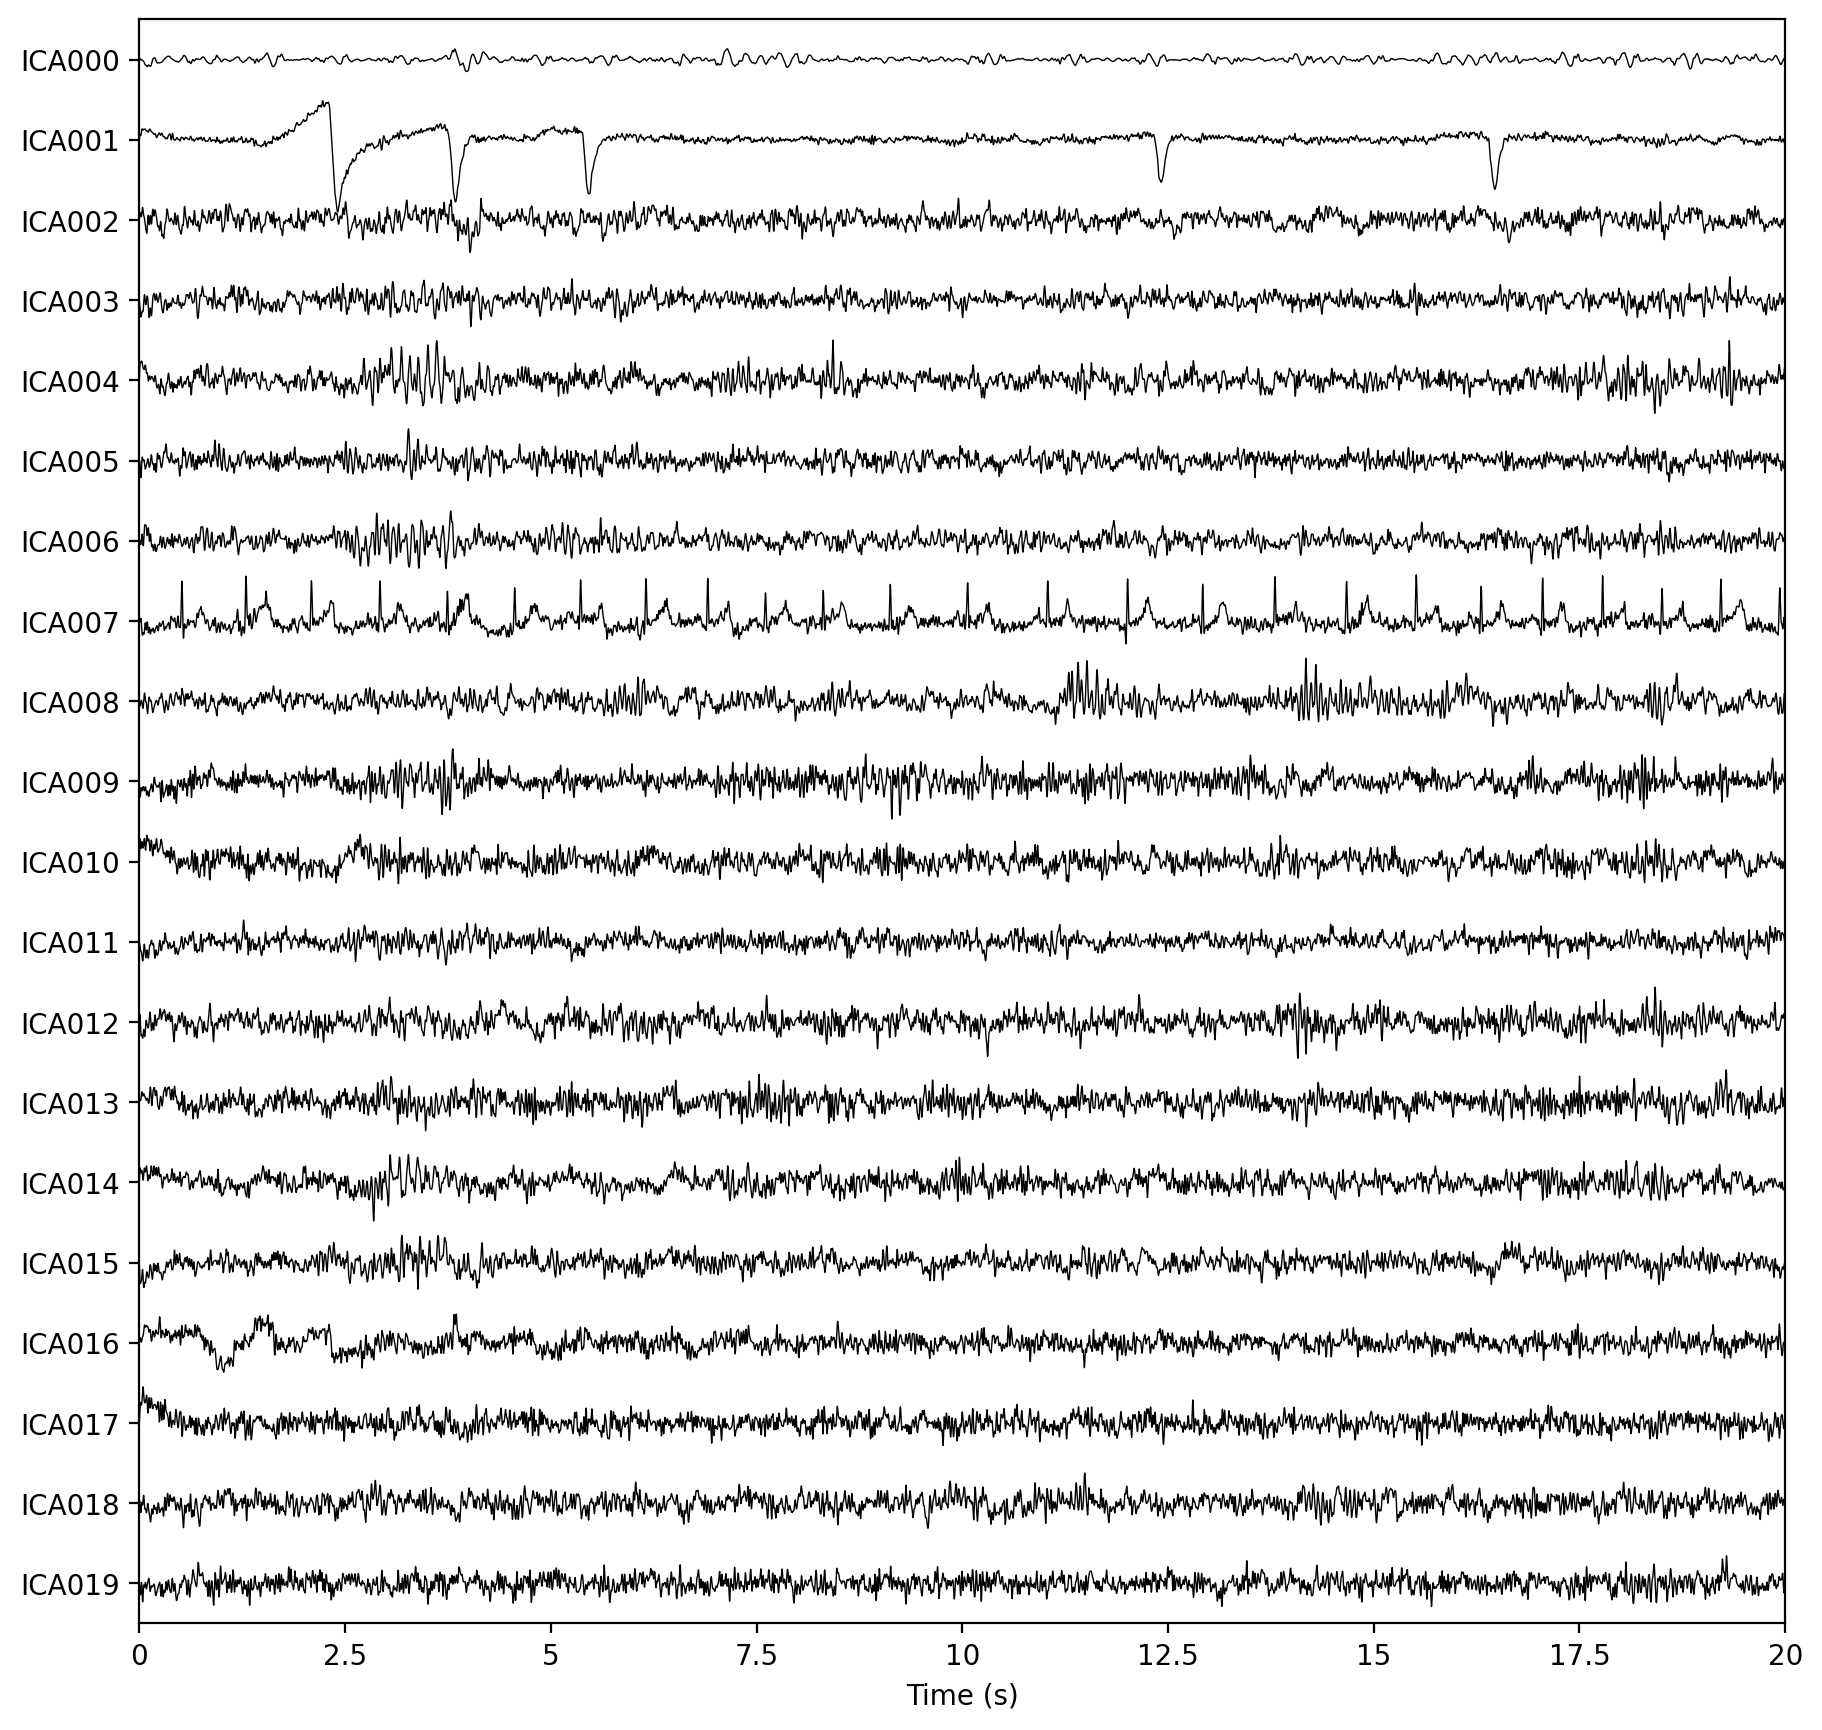

In [217]:
# Look at components signal
ica.plot_sources(raw_concatenated, show_scrollbars=False)

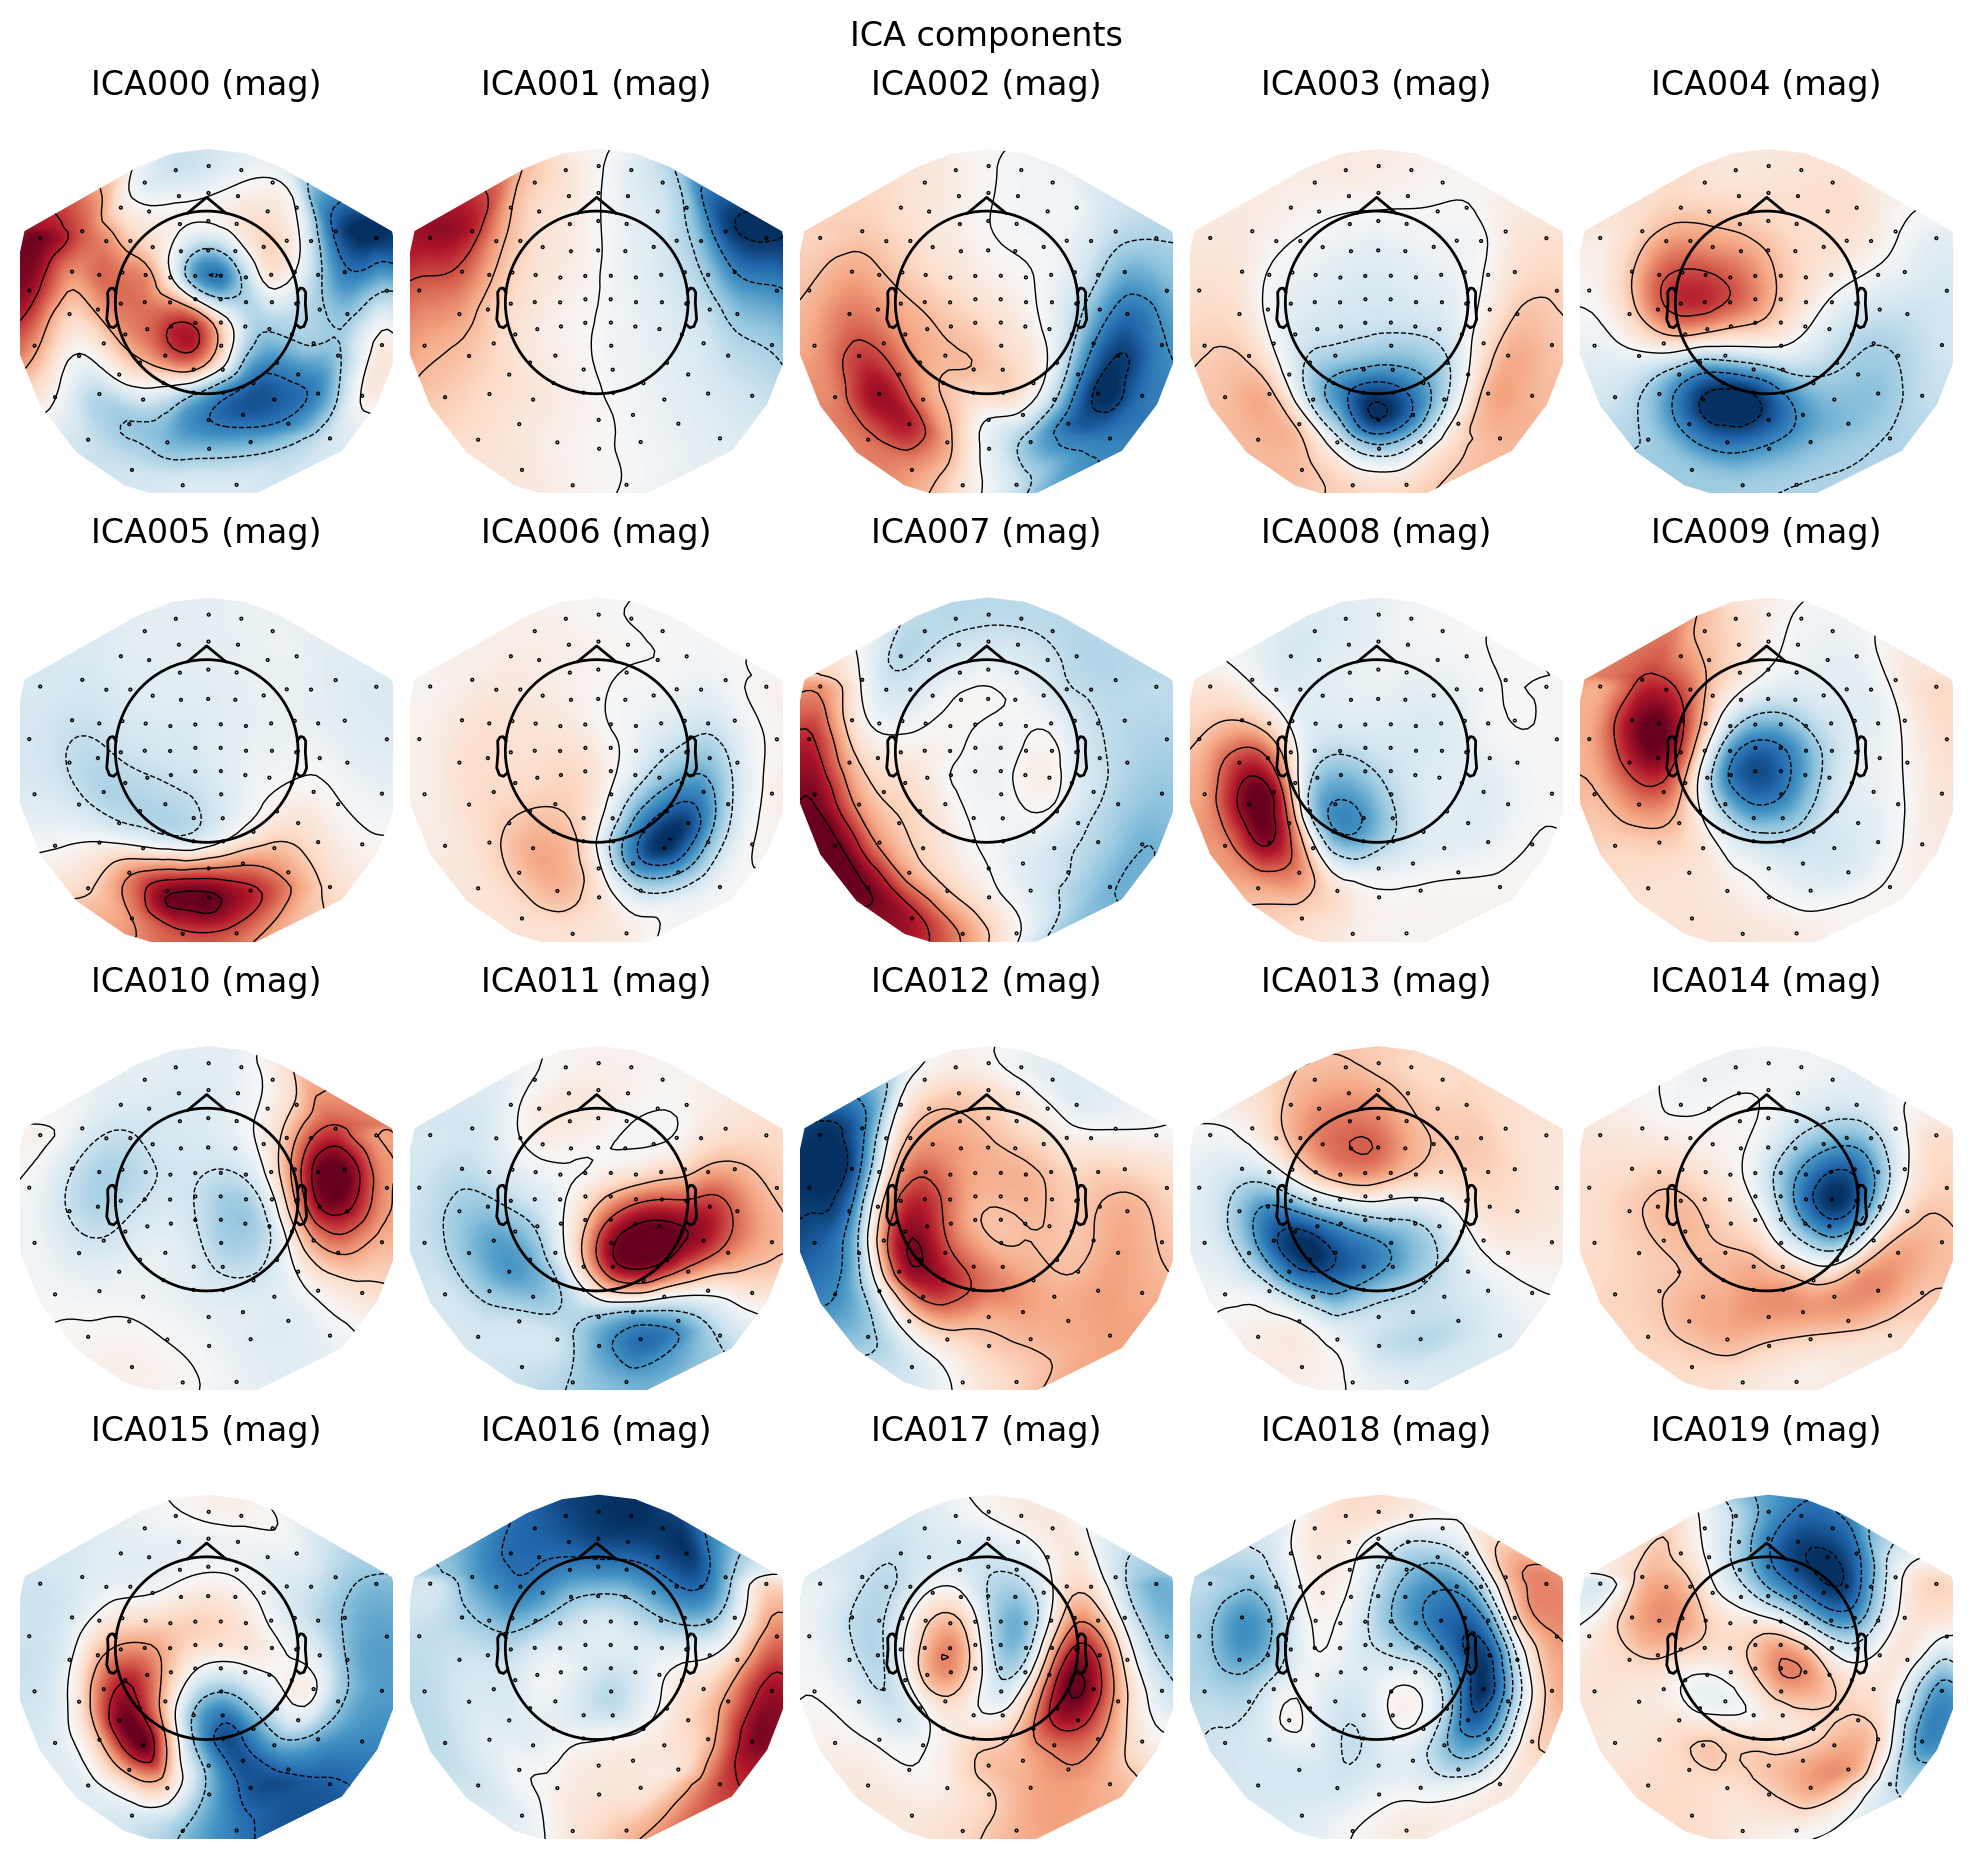

In [218]:
# Look at components topographic map
ica.plot_components()

In [221]:
# Noting artifact components
exclude_ica=[1,7]
ica.exclude=exclude_ica

for i in range(len(exclude_ica)):
    print(f'Excluded= Component {exclude_ica[i:02]}')

<b> Run ICA to remove artifacts </b>

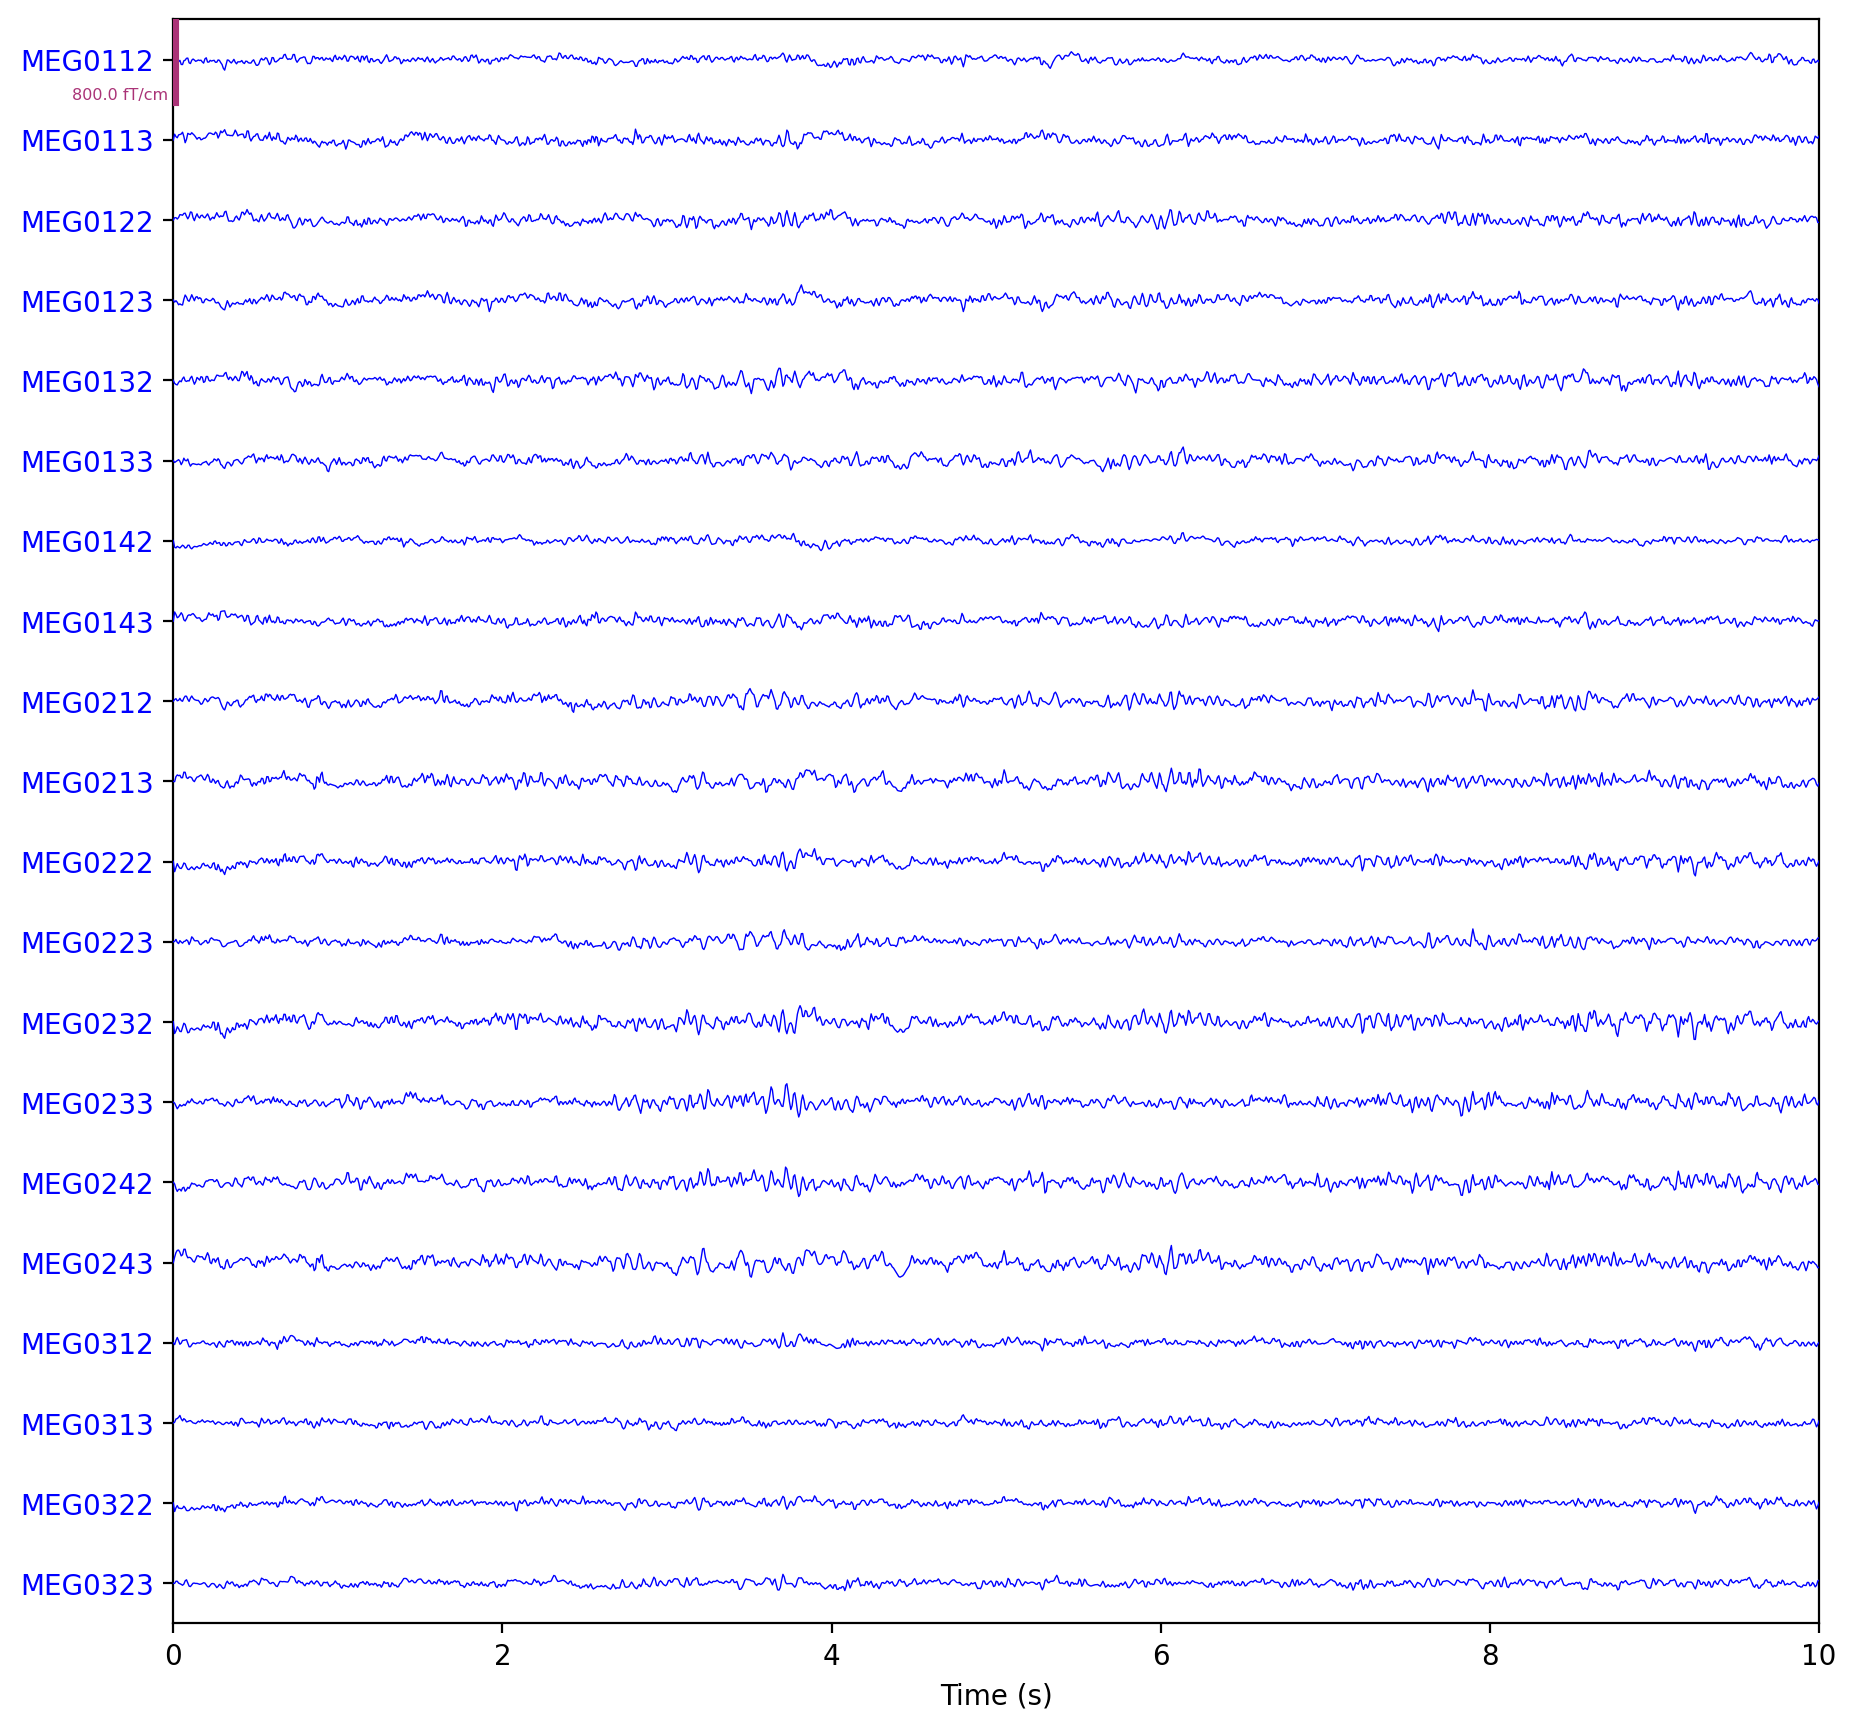

In [223]:
print('reconstructed Data')
reconst_raw=raw_concatenated.copy()
ica.apply(reconst_raw)

raw_concatenated.plot(show_scrollbars=False)
reconst_raw.plot(show_scrollbars=False)

In [224]:
del raw_concatenated
gc.collect()

0

### Evoked potential on presentation of items

In [225]:
raw=reconst_raw.copy()
del reconst_raw
gc.collect()

415

In [226]:
# Events
events_presentation = mne.find_events(raw,mask_type = "not_and",mask = 2**6+2**7+2**8+2**9+2**10+2**11+2**12+2**13+2**14+2**15, verbose=False, min_duration=0.1)

In [235]:
# Time window for epochs
tmin=-0.1
tmax=0.4 

# Create epochs
epochs = mne.Epochs(raw, events_presentation, event_itemsOnly_dict, tmin, tmax, baseline=(None, 0), on_missing='ignore', preload=True)


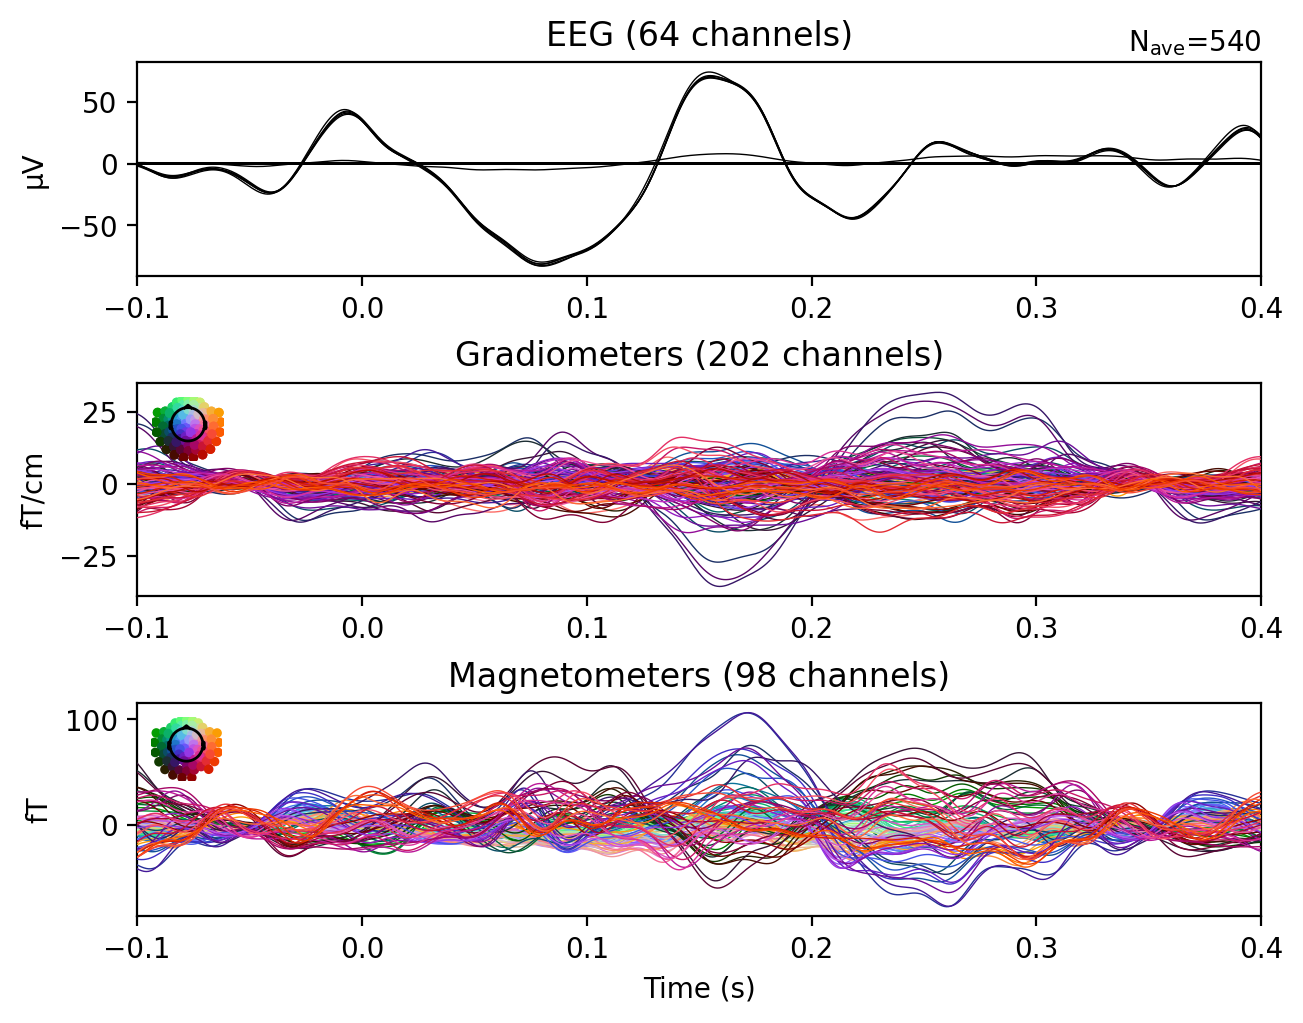

In [237]:
# Average the epochs to get evoked response
evoked = epochs.average()

# Plot the evoked response
evoked.plot()

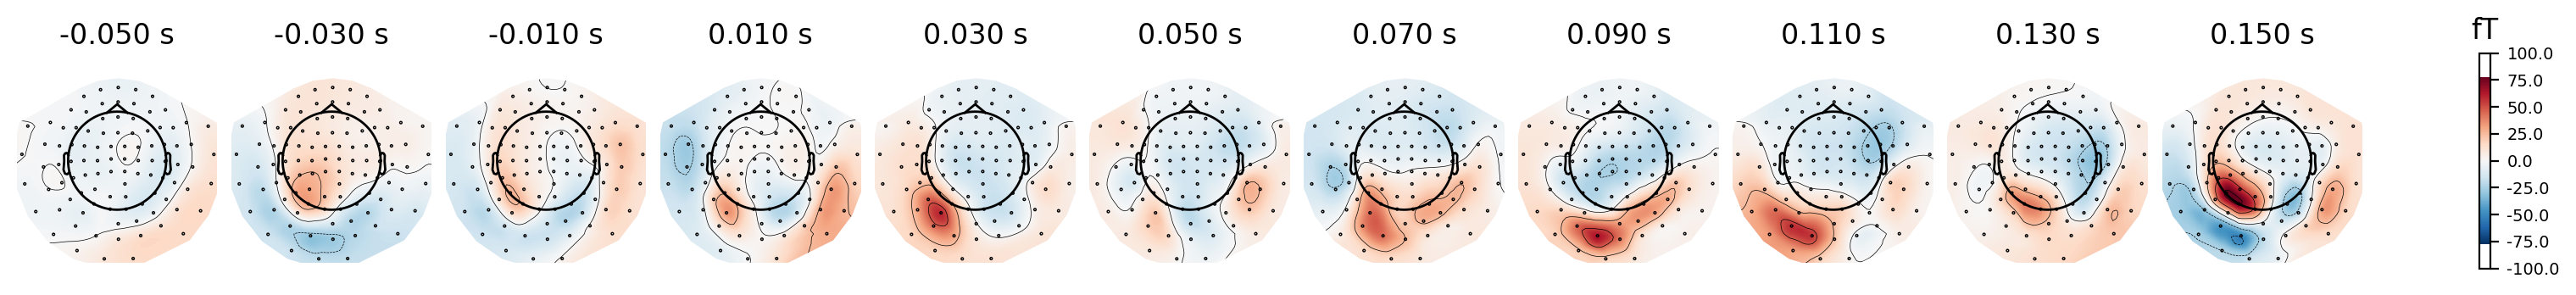

In [247]:
times = np.arange(-0.05, 0.151, 0.02)
evoked.plot_topomap(times)

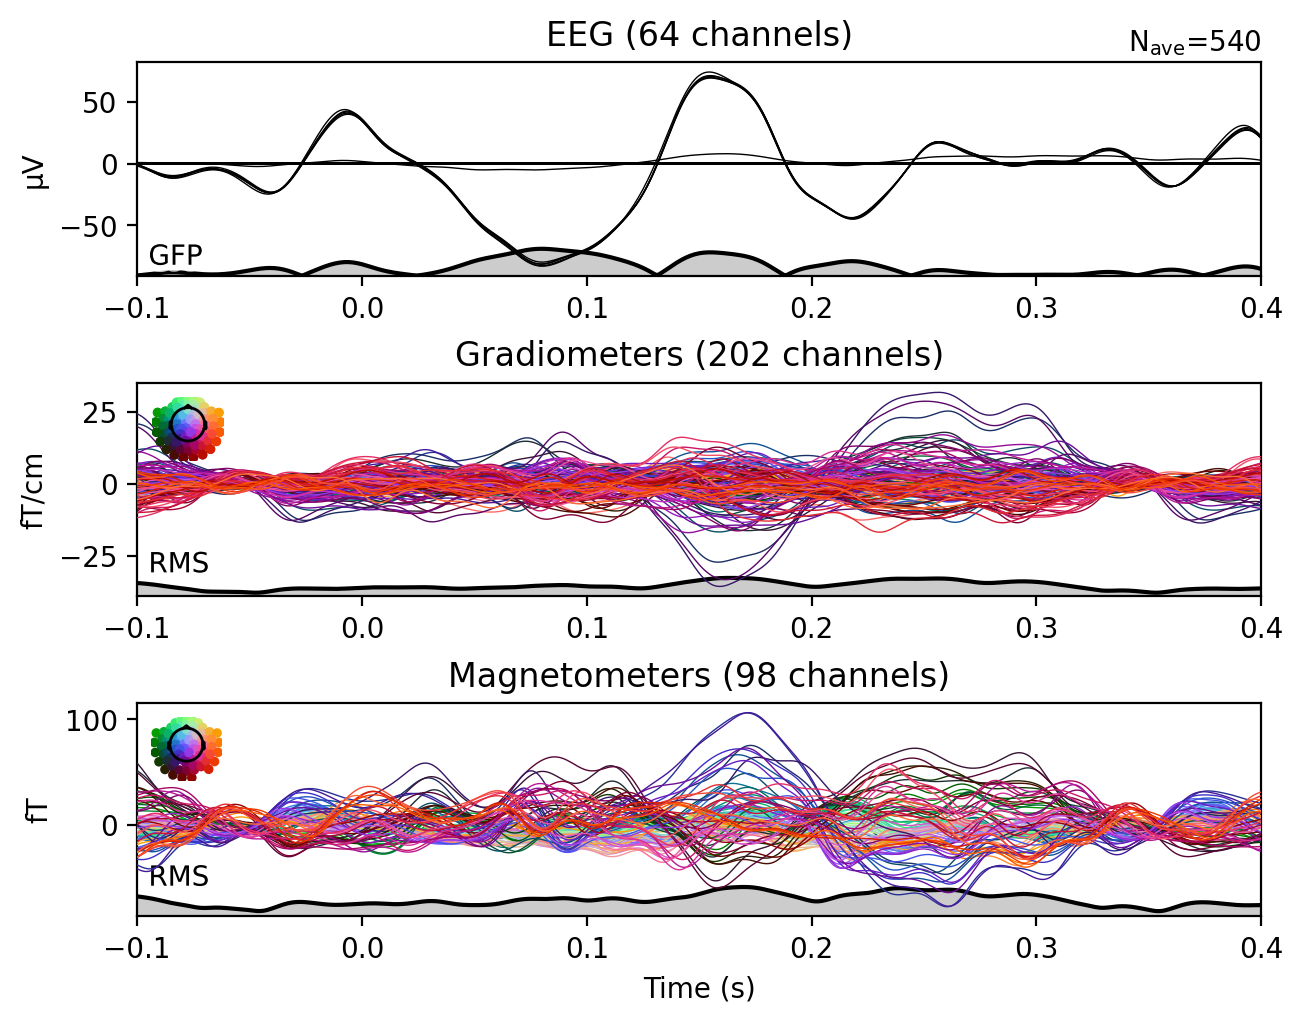

In [249]:
# Plotting with standard settings
evoked.plot(spatial_colors=True, gfp=True)